In [1]:
import sys 

print(sys.version
     )

3.8.5 (default, Oct  6 2021, 23:12:48) 
[Clang 12.0.0 (clang-1200.0.32.28)]


In [185]:
from scipy.spatial import Delaunay, delaunay_plot_2d, Voronoi, voronoi_plot_2d
import matplotlib.pyplot as plt
import numpy as np

w = h = 360

n = 50
pts = np.random.randint(0, 20, (n, 4))
pts = np.array([
    [1,1],
    [2,2],
    [1,-2],
    [1,4],
    [0,0]
])
print(pts)


[[ 1  1]
 [ 2  2]
 [ 1 -2]
 [ 1  4]
 [ 0  0]]


In [188]:
from scipy.spatial import Voronoi, Delaunay, ConvexHull
vor = Voronoi(pts)
print(vor.point_region[3])
print(vor.regions)
print(vor.vertices[vor.regions[vor.point_region[3]]])
ch = ConvexHull(vor.vertices[vor.regions[vor.point_region[3]]])

print(ch.volume)
fig = voronoi_plot_2d(vor)
plt.xlim(-5,10)
plt.ylim(-5,5)
plt.show()

5
[[], [3, 1, 0, 2], [1, -1, 0], [2, -1, 0], [3, -1, 1], [3, -1, 2]]
[[ 0.5  2.5]
 [ 0.5  2.5]
 [-1.5  2.5]]


QhullError: QH6154 Qhull precision error: Initial simplex is flat (facet 1 is coplanar with the interior point)

While executing:  | qhull i Qt
Options selected for Qhull 2019.1.r 2019/06/21:
  run-id 830875320  incidence  Qtriangulate  _pre-merge  _zero-centrum
  _max-width  2  Error-roundoff 2.1e-15  _one-merge 1.1e-14
  _near-inside 5.4e-14  Visible-distance 4.3e-15  U-max-coplanar 4.3e-15
  Width-outside 8.6e-15  _wide-facet 2.6e-14  _maxoutside 1.3e-14

The input to qhull appears to be less than 2 dimensional, or a
computation has overflowed.

Qhull could not construct a clearly convex simplex from points:
- p1(v3):   0.5   2.5
- p0(v2):   0.5   2.5
- p2(v1):  -1.5   2.5

The center point is coplanar with a facet, or a vertex is coplanar
with a neighboring facet.  The maximum round off error for
computing distances is 2.1e-15.  The center point, facets and distances
to the center point are as follows:

center point  -0.1667      2.5

facet p0 p2 distance=    0
facet p1 p2 distance=    0
facet p1 p0 distance= -0.47

These points either have a maximum or minimum x-coordinate, or
they maximize the determinant for k coordinates.  Trial points
are first selected from points that maximize a coordinate.

The min and max coordinates for each dimension are:
  0:      -1.5       0.5  difference=    2
  1:       2.5       2.5  difference=    0

If the input should be full dimensional, you have several options that
may determine an initial simplex:
  - use 'QJ'  to joggle the input and make it full dimensional
  - use 'QbB' to scale the points to the unit cube
  - use 'QR0' to randomly rotate the input for different maximum points
  - use 'Qs'  to search all points for the initial simplex
  - use 'En'  to specify a maximum roundoff error less than 2.1e-15.
  - trace execution with 'T3' to see the determinant for each point.

If the input is lower dimensional:
  - use 'QJ' to joggle the input and make it full dimensional
  - use 'Qbk:0Bk:0' to delete coordinate k from the input.  You should
    pick the coordinate with the least range.  The hull will have the
    correct topology.
  - determine the flat containing the points, rotate the points
    into a coordinate plane, and delete the other coordinates.
  - add one or more points to make the input full dimensional.


In [80]:

i = {1:1, 2:2}
print(np.array(list(i.values())))
a = np.array([1,2,3,4,5,6,7,8,9,10])
np.percentile(a, 75)

[1 2]


7.75

In [51]:
bool(any(None))

TypeError: 'NoneType' object is not iterable

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d as a3
from scipy.spatial import Voronoi, Delaunay, ConvexHull
from scipy.stats import gaussian_kde
import random 
import scipy
from scipy import stats
import itertools
import matplotlib.patches as pat

class PointsGenerater:
    
    def  __init__(self, points=None):
        self.points = points
        if not self.points:
            self.points = self.cone_random_gen()
    
    def random_generate(self, d, m):
        #n:次元
        #m:個数
        np.random.seed(40)
        self.points = np.random.rand(m, d)
        return self.points
    
    def two_random_gauss(self):
        np.random.seed(663)
        points_1 = np.random.multivariate_normal(
            [10,10],
            size=(1,300),
            cov=[
                [10,1],
                [0,14]])[0]
        points_2 = np.random.multivariate_normal(
            [-10,-10],
            size=(1,300),
            cov=[
                [15,0],
                [0,20]])[0]
        self.points = np.append(points_1, points_2, axis=0)
        return self.points
    
    def cone_random_gen(self):
        np.random.seed(900)
        
        self.points = np.random.multivariate_normal(
            [0,0],
            size=(1,200),
            cov=[
                [50,0],
                [0,50]])[0]

        for i in range(3):
            i += 1
            points_1 = np.random.multivariate_normal(
                [i * 17, i * 17],
                size=(1,200),
                cov=[
                    [50,0],
                    [0,50]])[0]

            points_2 = np.random.multivariate_normal(
                [i * 25, 0],
                size=(1,200),
                cov=[
                    [40,0],
                    [0,50]])[0]
            self.points = np.append(
                np.append(self.points, points_1, axis=0), 
                points_2, 
                axis=0
            )
        return self.points
    
    def random_points(self):
        return
    
    def multiply_lattice_constant(self, points):
        return
        
    def normalization(self):
        #計算量を下げるため真ん中に寄せて、平均値で縮小
        return (self.points - np.mean(self.points)) / np.mean(self.points)

class BoxSetter:

    def __init__(self, dimention=3):
        self.dimention = dimention
        self.base_vectors:np.array = np.eyes(dimention)
        
    def base_vectors_change(self, b_vectors:np.array):
        self.base_vectors = b_vectors

class VoronoiModel:

    def __init__(self, points:np.array ):

        '''
            #[[1,2,3,4],[71,3,21,4],[-1,3,42,4]...]それぞれはveriticesのインデックス
            self.regions = self.vor.regions

            #keyがpointのインデックスでvalueがregionのインデックス
            self.point_region = self.vor.point_region
            #以下いずれも、立体を作れないもののデータは除いてある
            #-1をregionsに含むものをのぞいている

            #keyはpointsのインデックス,valueはConvexHullオブジェクト
            self.all_CHes = dict()
            #keyはpointsのインデックス,valueはその体積
            self.all_volumes = dict()

            self.cleaned_points = list()
        '''
        
        self.vor = Voronoi(points)
        self.points = self.vor.points
        self.vertices = self.vor.vertices
        self.ridge_vertices = self.vor.ridge_vertices
        self.ridge_points = self.vor.ridge_points
        self.regions = self.vor.regions
        self.point_region = self.vor.point_region
        self.all_volumes = dict()
        self.all_CHes = dict()
        self.cleaned_points = list()
        self.name = 'Voronoi'

    def cal_volume(self):
        num_of_points = len(self.points)
        
        for i in range(num_of_points):
            region = self.regions[self.point_region[i]]
            #if -1 in tuple(region):
                #continue
            ch = ConvexHull(self.vertices[region])
            self.all_volumes[i], self.all_CHes[i] = ch.volume, ch
            self.cleaned_points.append(i)

    def remove_edge_points():
        return

class DelaunayModel:

    def __init__(self, points:np.array):

        '''
            #点のベクトルのリスト[[0.1,4.5,6.3],[2,4.9,7.1]...]インデックスが点の番号
            self.points = self.dln.points
            #三角系をなしている点のリストのリスト[[1,3,2,1],[1,0,4,2]...]
            self.vertices = self.dln.vertices
            #三角系をなしている点のリストのリスト[[1,3,2,5],[1,0,4,2]...]
            self.simplices = self.dln.simplices
            # 凸包の底面のリスト[[1,2,0],[3,4,5]...]
            self.convex_hull = self.dln.convex_hull
            #simplicesのインデックス,key三角形のインデックス(simplicesのいんでくす),value:その三角形のConvexHullオブジェクト
            self.all_CHes = self._return_CHes()
            #convexの体積の辞書key:三角形のインデックる,value:その三角形の体積
            self.all_volumes = dict()
            #あるpointのnum(key)に足してそれが属する三角形の体積のリスト(value)
            self.dict_of_points_and_volumes
            #あるpointのnum(key)にたいしてそれが属する三角形の体積全ての平均値(value)
            self.point_volume_dict
            self.name = 'Delaunay'
        '''
        
        self.dln = Delaunay(points)
        self.points = self.dln.points
        self.vertices = self.dln.vertices
        self.simplices = self.dln.simplices
        self.convex_hull = self.dln.convex_hull
        self.all_CHes = self._return_CHes()
        self.all_volumes = dict()
        self.dict_of_points_and_volumes = self.make_empty_dict()
        self.point_volume_dict = dict()
        self.name = 'Delaunay'
    
    def _return_CHes(self):
        regions = dict()
        ch = ConvexHull
        for i, j in enumerate(self.simplices):
            regions[i] = ch(
                self.points[j]
            )
        return regions
    
    def cal_volume(self):
        num_of_simplices = len(self.simplices)
        for i in range(num_of_simplices):
            self.all_volumes[i] = self.all_CHes[i].volume
        self.cal_point_volume()
    
    def cal_point_volume(self):
        
        for volume_num, ver in enumerate(self.vertices):
            for point_num in ver:
                self.dict_of_points_and_volumes[point_num].append(self.all_volumes[volume_num])
        
        for num ,value in self.dict_of_points_and_volumes.items():
            how_many = len(value)
            self.point_volume_dict[num] = sum(value) / how_many
    
    def make_empty_dict(self):
        dict_of_points_and_volumes = dict()
        for i in range(len(self.points)):
            dict_of_points_and_volumes[i] = []
        return dict_of_points_and_volumes
            
    
class KernelDesityEstimation:
    
    '''
    kernel関数数はガウスカーネル
    三角形や四角形のカーネルの方が良さそう
    いつか実装する
    '''
    
    def __init__(self, points:np.array):
        self.points = points
        self.transposed_points = points.T
        self.density_dict = dict()
        self.kde = None
        self.name = 'KDE'
        
    def density_estimation(self):
        self.kde = gaussian_kde(self.transposed_points)
        print(self.kde)
        for num, point in enumerate(self.points):
            self.density_dict[num] = self.kde.evaluate(point)
        return self.density_dict
        
class Tesselation:

    def __init__(self, points=None):
        self.points = points #生データ
        self.model_points = None #modelが持つpoints, modelインスタンスにデータを持たせる必要がある, またdataを正規化したものが入る
        #Voronoi
        self.v_points_volumes = dict()
        self.v_model = None
        #Delaunay
        self.d_points_volumes = dict()
        self.d_model = None
        #KDE
        self.kde_model = None
        self.kde_density = dict()
        self.kde_function = None
    
    def voronoi_cal(self, random=False):
        model = VoronoiModel(
            PointsGenerater(self.points).normalization()
        )
        model.cal_volume()
        self.v_model = model
        self.v_points_volumes = model.all_volumes
        self.model_points = model.points
    
    def v_display(self, dimention, what):
        display = Displayer(dimention)
        if dimention == 2 and any(self.v_points_volumes):
            pass
        elif dimention == 3 and any(self.v_points_volumes):
            if what == 'points':
                display.v_points(self.v_model.points)
            elif what == 'vertices':
                display.points(self.v_model.vertices)
            elif what == 'ridge_points':
                display.v_ridge_points(
                    self.v_model.ridge_points,
                    self.v_model.points
                )
            elif what == 'ridge_vertices':
                display.v_ridge_vertices(
                    self.v_model.ridge_vertices,
                    self.v_model.vertices
                )
            elif what == 'region_points':
                display.v_region_and_points(
                    self.v_model.vertices,
                    self.v_model.regions,
                    self.v_model.point_region
                )
            else:
                pass
    
    def v_show_data(self):
        table = Table(self.v_model).make_table()
        return table       
            
    def delaunay_cal(self, random=False):
        model = DelaunayModel(
            PointsGenerater(self.points).normalization()
        )
        model.cal_volume()
        self.d_model = model
        self.d_points_volumes = model.all_volumes
        self.model_points = model.points
    
    def d_display(self, dimention, what):
        display = Displayer(dimention)
        if dimention == 2:
            pass
        elif dimention == 3:
            if what == 'points':
                display.d_points(self.d_model.points)
            elif what == 'region_points':
                display.d_region_and_points(
                    self.d_model.points, 
                    self.d_model.vertices
                )
    
    def d_show_data(self):
        table = Table(self.d_model).make_table()
        return table
    
    def kernel_density_estimation(self):
        model = KernelDesityEstimation(
            PointsGenerater(self.points).normalization()
        )
        self.kde_density = model.density_estimation()
        self.kde_function = model.kde
        self.kde_model = model
        self.model_points = model.points
    
    def kde_show_data(self):
        table = Table(self.kde_model).return_table()
        return table
    
    def kde_delaunay_model_show(self):
        display = Displayer(dimention=2)
        display.all_model_drawing(
            self.model_points, 
            self.d_model, 
            self.kde_function
        )

class Table:
    def __init__(self, model):
        self.model = model
        self.model_name = model.name
        self.points = model.points
        self.v_table = pd.DataFrame()
        self.d_table = pd.DataFrame()
        self.kde_table = pd.DataFrame()

    def make_table(self):
        if self.model_name == 'Delaunay':
            num_of_points = len(self.model.points)
            self.d_table = pd.DataFrame(
                index=[i for i in range(num_of_points)],
                columns=[
                    'volume', 
                    'point_index'
                    ]
            )
            for i in range(num_of_points):
                self.d_table.iloc[i,:] = [
                    self.model.point_volume_dict[i],
                    i
                ]
            return self.d_table
        
        elif self.model_name == 'Voronoi':
            self.v_table = pd.DataFrame(
                columns=['volume', 
                        'vertices', 
                        'num_of_vertices', 
                        'convex_hull_index(index_of_point)'
                        ],
                index=[i for i in range(len(self.model.cleaned_points))]
            )
            counter = 0
            for i in self.model.cleaned_points:
                self.v_table.iloc[counter,:] = [
                    self.model.all_volumes[i],
                    self.model.vertices[self.model.regions[self.model.point_region[i]]],
                    self.model.regions[self.model.point_region[i]],
                    i
                ]
                counter += 1
            return self.v_table
                
        elif self.model_name == 'KDE':
            self.kde_table = pd.DataFrame(
                columns=['density', 'point_index', 'point'],
                index=[i for i in range(len(self.model.points))]
            )
            for index, density in self.model.density_dict.items():
                self.kde_table.iloc[index,:] = [
                    density,
                    index,
                    self.model.points[index]
                ]
            return self.kde_table
    
    def is_table(self):
        if self.model_name == 'Delaunay':
            return bool(any(self.d_table))
        elif self.model_name == 'Voronoi':
            return bool(any(self.v_table))
        elif self.model_name == 'KDE':
            return bool(any(self.kde_table))
    
    def return_table(self):
        if self.model_name == 'Delaunay':
            if self.is_table():
                return self.d_table
            else:
                return self.make_table()
        elif self.model_name == 'Voronoi':
            if self.is_table():
                return self.v_table
            else:
                return self.make_table()
        elif self.model_name == 'KDE':
            if self.is_table():
                return self.kde_table
            else:
                return self.make_table()
    
    @staticmethod
    def take_higher(p_v_dict, per):
        higher = np.percentile(np.array(list(p_v_dict.values())), per)
        return dict(filter(lambda item: item > higher, p_v_dict.items()))
    

class Displayer:

    def __init__(self, dimention):
        self.dimention = dimention

    def v_points(self, points):
        if self.dimention == 2:
            fig, (ax1, ax2)= plt.subplots(2)
            pass
        elif self.dimention == 3:
            fig = plt.figure(figsize=(10,10))
            ax = fig.add_subplot(111, projection='3d')
            ax.set_xlabel('x')
            ax.set_ylabel('y')
            ax.set_zlabel('z')
            ax.set_title('Atomic positions of interest')
            x, y, z = points[:,0], points[:,1], points[:,2]
            ax.plot(x, y, z, "o", ms=5, mew=0.5, label='point')
            plt.show()

    def v_vertices(self, vertices):
        if self.dimention == 2:
            pass
        elif self.dimention == 3:
            fig = plt.figure(figsize=(10,10))
            ax = fig.add_subplot(111, projection='3d')
            ax.set_xlabel('x')
            ax.set_ylabel('y')
            ax.set_zlabel('z')
            ax.set_title('Vertices of Voronoi cells')
            x, y, z = vertices[:, 0], vertices[:, 1], vertices[:, 2]
            ax.plot(x, y, z, "o", color="green", ms=4, mew=0.5)
            plt.show()
    
    def v_ridge_points(self, ridge_points, points):
        if self.dimention == 2:
            pass
        elif self.dimention == 3:
            fig = plt.figure(figsize=(10,10))
            ax = fig.add_subplot(111, projection='3d')

            ax.set_xlabel('x')
            ax.set_ylabel('y')
            ax.set_zlabel('z')
            ax.set_title('Pairs of atoms between which each Voronoi ridge plane lies')
            for pair in points[ridge_points]:
                ax.plot(pair[:, 0], pair[:, 1], pair[:, 2], color='C0')
            plt.show()
    
    def v_ridge_vertices(self, ridge_vertices, v_vertices):
        if self.dimention == 2:
            pass
        elif self.dimention == 3:
            fig = plt.figure(figsize=(10,10))
            ax = fig.add_subplot(111, projection='3d')
            ax.set_xlabel('a')
            ax.set_ylabel('b')
            ax.set_zlabel('c')
            ax.set_aspect('equal')
            ax.set_xlim(-10,10)
            ax.set_ylim(-10,10)
            ax.set_zlim(-10,10)
            ax.set_title('Voronoi ridge planes')
            ridgenum = 0
            for i in np.array(ridge_vertices):
                #-1を含むものを取り除く
                if -1 not in i:
                    vertices = v_vertices[i]
                    xy, z = vertices[:, :-1], vertices[:, -1]
                    ridgenum += 1
                    poly=a3.art3d.Poly3DCollection([vertices],alpha=0.3)
                    poly.set_edgecolor('b')
                    poly.set_facecolor([0.5, 0.5, 1])
                    ax.add_collection3d(poly)
            plt.show()
        
    def v_region_and_points(self, vertices, regions, point_region):
        fig = plt.figure(figsize=(10,10))
        ax = fig.add_subplot(111, projection='3d')

        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('z')
        ax.set_title('Voronoi ridge planes')
        '''
        ax.set_xlim(-10,10)
        ax.set_ylim(-10,10)
        ax.set_zlim(-10,10)
        '''
        
        for p in range(len(point_region)):
            color = f'C{p//2}' # 'C0' or 'C1'
            # Voronoi regionの頂点から凸包(convex hull)を求めてその面を表示
            if -1 in tuple(regions[point_region[p]]):
                continue
            ch = ConvexHull(vertices[regions[point_region[p]]])
            poly = a3.art3d.Poly3DCollection(
                ch.points[ch.simplices], 
                alpha=0.3, 
                facecolor=color, 
                edgecolor='b'
            )
            ax.add_collection3d(poly)

            chpnts = ch.points[ch.vertices]
            ax.plot(chpnts[:, 0], chpnts[:, 1], chpnts[:, 2], ".", color=color, ms=10, mew=0.5)
        
    def d_points(self, points):
        if self.dimention == 2:
            pass
        elif self.dimention == 3:
            fig = plt.figure(figsize=(10,10))
            ax = fig.add_subplot(111, projection='3d')
            ax.set_xlabel('x')
            ax.set_ylabel('y')
            ax.set_zlabel('z')
            ax.set_title('Atomic positions of interest')
            x, y, z = points[:,0], points[:,1], points[:,2]
            ax.plot(x, y, z, "o", ms=5, mew=0.5, label='point')
            plt.show()
    
    def d_region_and_points(self, points, d_vertices):
        fig = plt.figure(figsize=(10,10))
        ax = fig.add_subplot(111, projection='3d')

        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('z')
        ax.set_title('Delaunay planes')

        for n, pair in enumerate(d_vertices):
            color = f'C{n//2}'
            ch = ConvexHull(points[pair])
            poly = a3.art3d.Poly3DCollection(
                ch.points[ch.simplices], 
                alpha=0.1, 
                facecolor=color, 
                edgecolor='b'
            )
            ax.add_collection3d(poly)
            chpnts = ch.points[ch.vertices]
            ax.plot(chpnts[:, 0], chpnts[:, 1], chpnts[:, 2], ".", color=color, ms=10, mew=0.5)
    
    def all_model_drawing(self, points, d_model, kde_model):
        if self.dimention == 2:
            fig = plt.figure(facecolor="w", figsize=(10,10))
            ax = fig.add_subplot(111, title="kernel density estimation and Delaunay tessellation")
            _x = points[:,0]
            _y = points[:,1]
            xlim = (np.min(_x) - 0.1, np.max(_x) + 0.1)
            ylim = (np.min(_y) - 0.1, np.max(_y) + 0.1)
            x = np.linspace(xlim[0], xlim[1], int((xlim[1] - xlim[0])) * 10 )
            y = np.linspace(ylim[0], ylim[1], int((ylim[1] - ylim[0])) * 10 )
            xx, yy = np.meshgrid(x, y)
            meshdata = np.vstack([xx.ravel(), yy.ravel()])
            z = kde_model.evaluate(meshdata)
            ax.scatter(points[:, 0], points[:, 1], c="b")
            ax.contourf(xx, yy, z.reshape(len(y), len(x)), cmap="Blues", alpha=0.5)
            
            for n, pair in enumerate(d_model.vertices):
                #color = f'C{n//2}'
                three_points = points[pair]
                poly = pat.Polygon(
                    three_points,
                    alpha = 0,
                    linestyle=':'
                    
                )
                ax.add_patch(poly)
                ax.plot(three_points[:,0], three_points[:,1], lw=0.5, linestyle='--',color='green', alpha=0.5)
            plt.show()


In [70]:
a = Tesselation()
a.delaunay_cal()
a.voronoi_cal()
a.kernel_density_estimation()



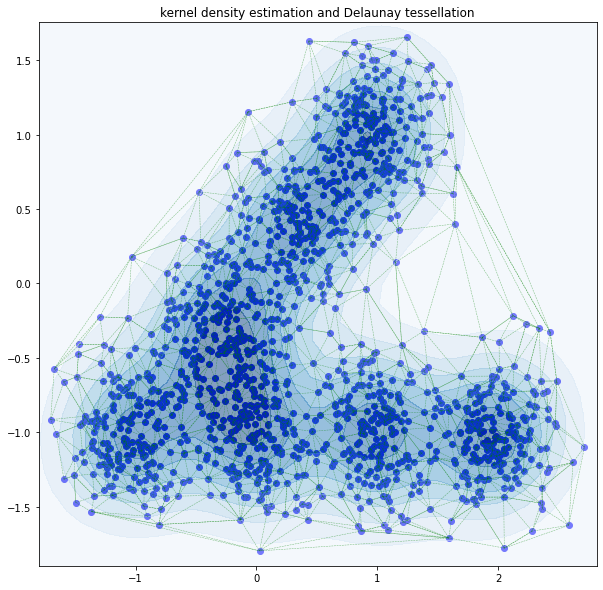

In [71]:
a.kde_delaunay_model_show()

In [40]:
a.d_show_data().sort_values('volume', ascending=False).head(20)

,volume,point_index
1370,53.7489,1370
800,53.2807,800
1225,47.3743,1225
1376,39.8039,1376
1147,37.4782,1147
935,36.1203,935
1127,31.9693,1127
1381,26.8142,1381
1124,26.3379,1124
1197,25.4962,1197


In [41]:
a.kde_show_data().sort_values('density').head(20)

/Users/mukaiyama/.pyenv/versions/3.8.5/lib/python3.8/site-packages/pandas/core/internals/blocks.py:849: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr_value = np.array(value)


,density,point_index,point
1225,[8.06017005084424e-06],1225,"[58.6608973393424, -47.906427578169684]"
1370,[1.240026121129978e-05],1370,"[47.77829207188799, -3.400155443855816]"
253,[1.955634128811026e-05],253,"[-18.917560776067482, 9.811378018543369]"
800,[2.082518814818553e-05],800,"[19.656568492870345, -46.80830680664097]"
935,[2.3830079628715077e-05],935,"[35.523360023332486, -5.023828508537658]"
1204,[2.6582968464918443e-05],1204,"[66.0767863756629, -35.00525866402062]"
93,[2.6950476253473918e-05],93,"[-40.45415881226516, -12.476936287301248]"
1197,[2.8123654682112618e-05],1197,"[33.164937515390434, -4.919672004138899]"
1138,[2.817209301964016e-05],1138,"[13.018131591262904, 42.410948240776534]"
287,[2.905858532769331e-05],287,"[-27.217373830509196, 0.7412159018172488]"


In [42]:
a.v_show_data().sort_values('volume', ascending=False).head(20)

/Users/mukaiyama/.pyenv/versions/3.8.5/lib/python3.8/site-packages/pandas/core/internals/blocks.py:849: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr_value = np.array(value)


,volume,vertices,num_of_vertices,convex_hull_index(index_of_point)
116,11903.6,"[[-31.530670410028197, -38.843246581710666], [...","[83, 17, 9, -1, 2, 10, 82]",116
253,9814.03,"[[-12.128082661408055, 11.466864262206226], [-...","[611, 47, 46, 0, 1, -1, 3, 21, 116, 240, 609]",253
1138,6144.28,"[[5.261956385902488, 40.152860022727], [12.983...","[1603, 822, 487, 118, -1, 1, 1602]",1138
160,3894.59,"[[-2.330994293056493, -71.61663923427187], [-1...","[1284, 897, -1, 9, 16, 189, 702, 1082, 1081, 1...",160
1147,3891.01,"[[41.35861639181952, 28.118835139862096], [44....","[131, 34, 33, 32, -1, 5, 7, 4, 128, 129, 130]",1147
287,2571.09,"[[-26.678743887034955, -1.5545694888351442], [...","[24, 12, 3, 21]",287
1361,2318.27,"[[71.86019708390462, -27.151182523613024], [-4...","[349, -1, 5, 6, 51, 348]",1361
93,2259.37,"[[-38.79490419703691, -15.127413199991768], [-...","[101, -1, 3, 12, 97]",93
799,1459.28,"[[-14.286226975568312, 48.19294576978], [-102....","[1602, 1, 0, 42, 41, 14, 27, 1601]",799
800,1243.31,"[[11.2125480244048, -46.297511416464424], [10....","[991, 896, 897, -1, 8, 183, 989]",800


In [206]:
from scipy.spatial import Delaunay, delaunay_plot_2d, Voronoi, voronoi_plot_2d
import matplotlib.pyplot as plt
import numpy as np

w = h = 360

n = 10
np.random.seed(0)
pts = np.random.randint(0, w, (n, 4))

print(pts)
# [[172  47]
#  [117 192]
#  [323 251]
#  [195 359]
#  [  9 211]
#  [277 242]]

print(type(pts))
# <class 'numpy.ndarray'>

print(pts.shape)
# (6, 2)

[[172  47 117 192]
 [323 251 195 359]
 [  9 211 277 242]
 [292  87  70  88]
 [314 193  39  87]
 [174  88 337 165]
 [ 25 333  72 265]
 [115 243 197 335]
 [338  99 177 243]
 [285 147 147 288]]
<class 'numpy.ndarray'>
(10, 4)


In [49]:
np.random.normal(0, 1, 10)

def gauss_distribution(n, m):
    gauss = np.array()
    for i in range(m):
        gauss.append(np.random.normal(0, ))

array([ 0.24778782, -0.19704709, -0.78984518,  0.05793305, -1.96527367,
       -0.33385061,  0.52973843,  0.88274714, -1.5730372 , -0.03155007])

In [208]:
tri = Delaunay(pts)
#単純に点の座標
print(tri.points)
#verticeのインデックス
print(tri.vertices[0])
#どの点と結んで三角系を形成しているか
print(tri.simplices[0])

print('a',tri.convex_hull)
'''
for i , j in enumerate(tri.vertices):
    ch = ConvexHull(tri.points[j])
    print(ch.simplices)
    print(ch.points)
'''

[[172.  47. 117. 192.]
 [323. 251. 195. 359.]
 [  9. 211. 277. 242.]
 [292.  87.  70.  88.]
 [314. 193.  39.  87.]
 [174.  88. 337. 165.]
 [ 25. 333.  72. 265.]
 [115. 243. 197. 335.]
 [338.  99. 177. 243.]
 [285. 147. 147. 288.]]
[7 4 6 1 2]
[7 4 6 1 2]
a [[4 6 1 2]
 [7 6 1 2]
 [5 4 1 2]
 [7 5 1 2]
 [9 4 6 1]
 [9 7 6 1]
 [5 4 1 8]
 [9 4 1 8]
 [7 5 1 8]
 [9 7 1 8]
 [9 7 5 8]
 [3 5 4 8]
 [9 3 4 8]
 [0 3 5 8]
 [0 9 5 8]
 [0 9 3 8]
 [0 7 5 2]
 [3 5 4 2]
 [0 3 5 2]
 [0 9 7 5]
 [0 9 3 4]
 [0 7 6 2]
 [3 4 6 2]
 [0 3 6 2]
 [0 3 4 6]
 [0 9 4 6]
 [0 9 7 6]]


'\nfor i , j in enumerate(tri.vertices):\n    ch = ConvexHull(tri.points[j])\n    print(ch.simplices)\n    print(ch.points)\n'

In [178]:
#面積を求める
ch = ConvexHull
for j, i in enumerate(tri.simplices):
    print(j)
    print(tri.vertices)
    print(tri.points[i])
    volume = ch(tri.points[i])
    print(volume.volume)

0
[[3 2 0 5]
 [3 2 0 4]
 [3 1 2 5]]
[[211. 277. 242.]
 [195. 359.   9.]
 [172.  47. 117.]
 [ 88. 314. 193.]]
1296252.8333333335
1
[[3 2 0 5]
 [3 2 0 4]
 [3 1 2 5]]
[[211. 277. 242.]
 [195. 359.   9.]
 [172.  47. 117.]
 [292.  87.  70.]]
1283431.0000000005
2
[[3 2 0 5]
 [3 2 0 4]
 [3 1 2 5]]
[[211. 277. 242.]
 [192. 323. 251.]
 [195. 359.   9.]
 [ 88. 314. 193.]]
213373.16666666645


In [175]:
a = dict()
a[0] = [1,2,3]

In [176]:
a

{0: [1, 2, 3]}